<a href="https://colab.research.google.com/github/MaschinenNah/MachineLearningKochbuch01/blob/main/07_KonturenExtrahieren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Konturen extrahieren



In [1]:
!git clone https://github.com/MaschinenNah/ml_utils
from ml_utils import load

Cloning into 'ml_utils'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 34 (delta 5), reused 28 (delta 4), pack-reused 0
Unpacking objects: 100% (34/34), done.


In [2]:
zip_url = "http://pitnoack.de/mn/objekte/data.zip"
load.load_and_unzip_from_url(zip_url)

## Konturen Extrahieren

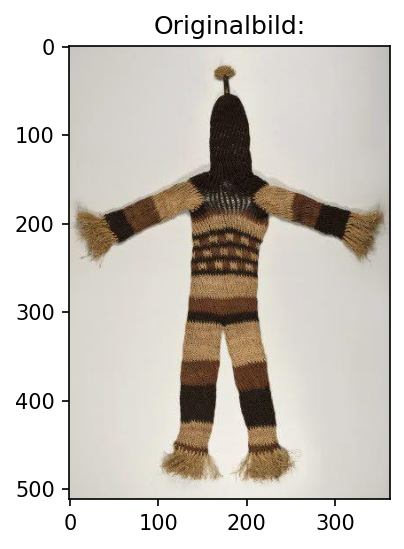

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

figur = "/content/data/img_raw/1345935_1.jpg"
tierfigur = "/content/data/img_raw/1111368_1.jpg"
schale = "/content/data/img_raw/1109039_1.jpg"
kopfschmuck = "/content/data/img_raw/1110649_1.jpg"
umhang = "/content/data/img_raw/1110523_1.jpg"
traeger = "/content/data/img_raw/1109058_1.jpg"

figur2 = "/content/data/img_raw/1111360_1.jpg"
figur3 = "/content/data/img_raw/1345943_1.jpg"
figur4 = "/content/data/img_raw/1111365_1.jpg"
boot = "/content/data/img_raw/1345924_1.jpg"

img_raw_path = figur

### Parameter für Kantendetektion per Canny Algorithmus
CANNY_THRESH_1 = 10
CANNY_THRESH_2 = 200

### Größe der Darstellung
plt.rcParams['figure.dpi'] = 150

### Bild laden
img_raw = cv2.imread(img_raw_path)
img_raw = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
plt.imshow(img_raw)
plt.title("Originalbild:")
plt.show()

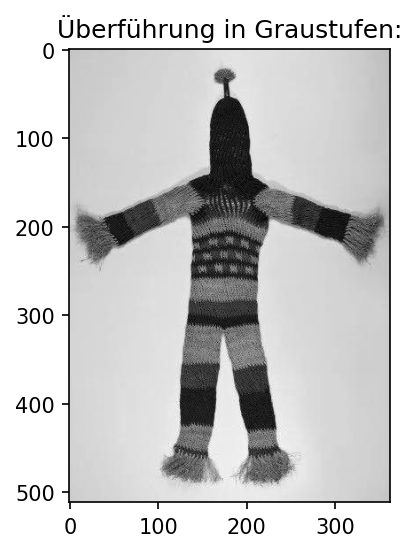

In [4]:
### In Graustufen-Bild konvertieren
gray = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title("Überführung in Graustufen:")
plt.show()

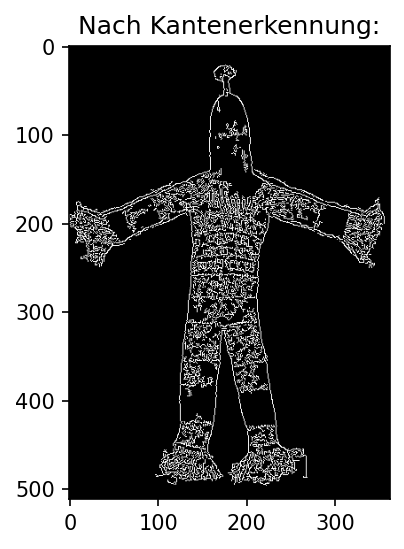

In [5]:
### Kanten erkennen:
edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
plt.imshow(edges, cmap='gray')
plt.title("Nach Kantenerkennung:")
plt.show()

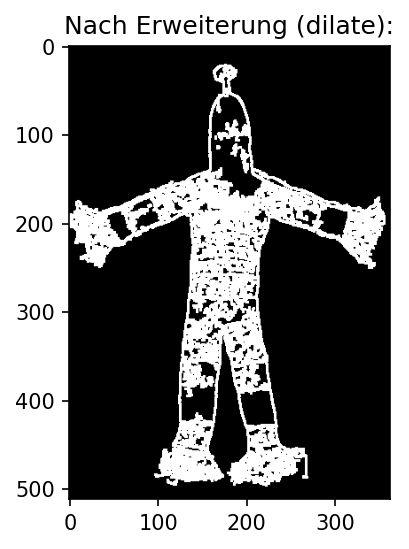

In [6]:
### Erweitern:
dilated = cv2.dilate(edges, None)
plt.imshow(dilated, cmap='gray')
plt.title("Nach Erweiterung (dilate):")
plt.show()

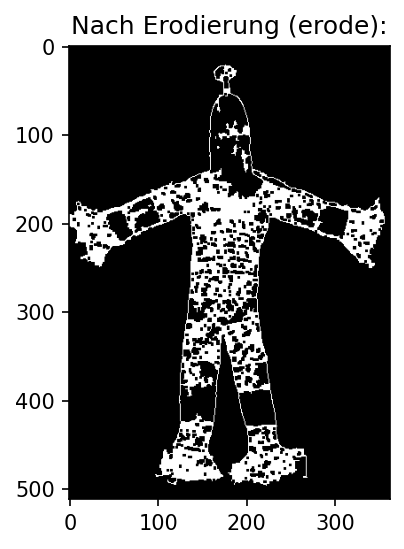

In [7]:
### Erodieren:
eroded = cv2.erode(dilated, None)
plt.imshow(eroded, cmap='gray')
plt.title("Nach Erodierung (erode):")
plt.show()

In [8]:
### Suche nach Konturen in den Kanten:
# contours ist eine Liste, die alle Konturen in edges (= geschlossene Linien) enthält.
# Jeder Eintrag ist ein Numpy Array mit Koordinatenpaaren.
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Leere Liste:
contour_with_area_size = []

# Die Liste wird gefüllt:
# Jeder Eintrag ist ein zweistelliges Tupel.
# Das erste Element ist die Kontur (Numpy Array mit Koordinatenpaaren).
# Das zweite Element ist der Flächeninhalt.
for c in contours:
  contour_with_area_size.append( (c, cv2.contourArea(c)) )

# Sortierung nach Flächeninhalt.
# Konturen, die eine große Fläche umschliessen, kommen zuerst!
contour_with_area_size_sorted_by_size = sorted(contour_with_area_size, key=lambda c: c[1], reverse=True)

# Der Flächeninhalt wird nicht mehr benötigt.
# Folgender Ausdruck erzeugt eine neue Liste, die nur noch die Konturen speichert:
contours_sorted_by_size = [tupel[0] for tupel in contour_with_area_size_sorted_by_size]


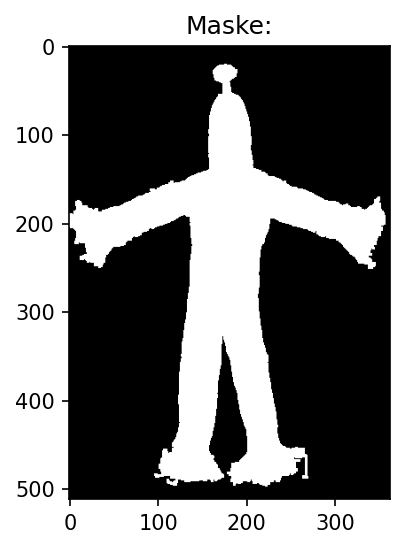

In [9]:
mask = np.zeros_like(img_raw)
mask.fill(0)

cv2.drawContours(mask, contours_sorted_by_size, 0, (255, 255, 255), cv2.FILLED)
plt.title("Maske:")
plt.imshow(mask)

(512, 362)


True

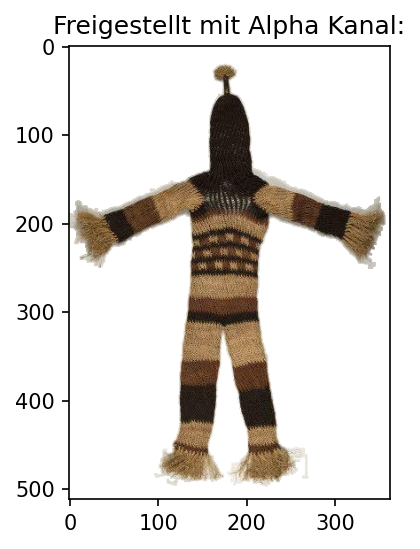

In [10]:
width = img_raw.shape[1]
height = img_raw.shape[0]
alpha_channel = mask[:,:,:1].reshape((height, width))
print(alpha_channel.shape)
img_with_alpha = np.dstack((img_raw, alpha_channel))
plt.imshow(img_with_alpha)
plt.title("Freigestellt mit Alpha Kanal:")
cv2.imwrite("alpha.png", img_with_alpha)